In [6]:
%pylab inline
import os.path
from subprocess import call
from IPython.display import Image
from IPython.display import HTML
font = {'size':13, 'family':'serif'}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


To compute the dynamical friction that the MW 'feels' due to Sag the enclosed Mass of the MW that is in 
the Sag virial radius (Rv_sag) have to be computed. It is important to rememeber that:

- $ Rv_{Sag} \sim  \dfrac{Rv_{MW}}{2}$ 
- $M_{Sag} \sim \dfrac{M_{MW}}{10}$

In our first method the enclosed mass is computed as the mass inside a NFW sphere of radius $D$
where $D$ is the distance from the Sag Halo innner boundary to the MW halo boundary. This is sketch in Fig.1

$D = Rv_MW - ()$

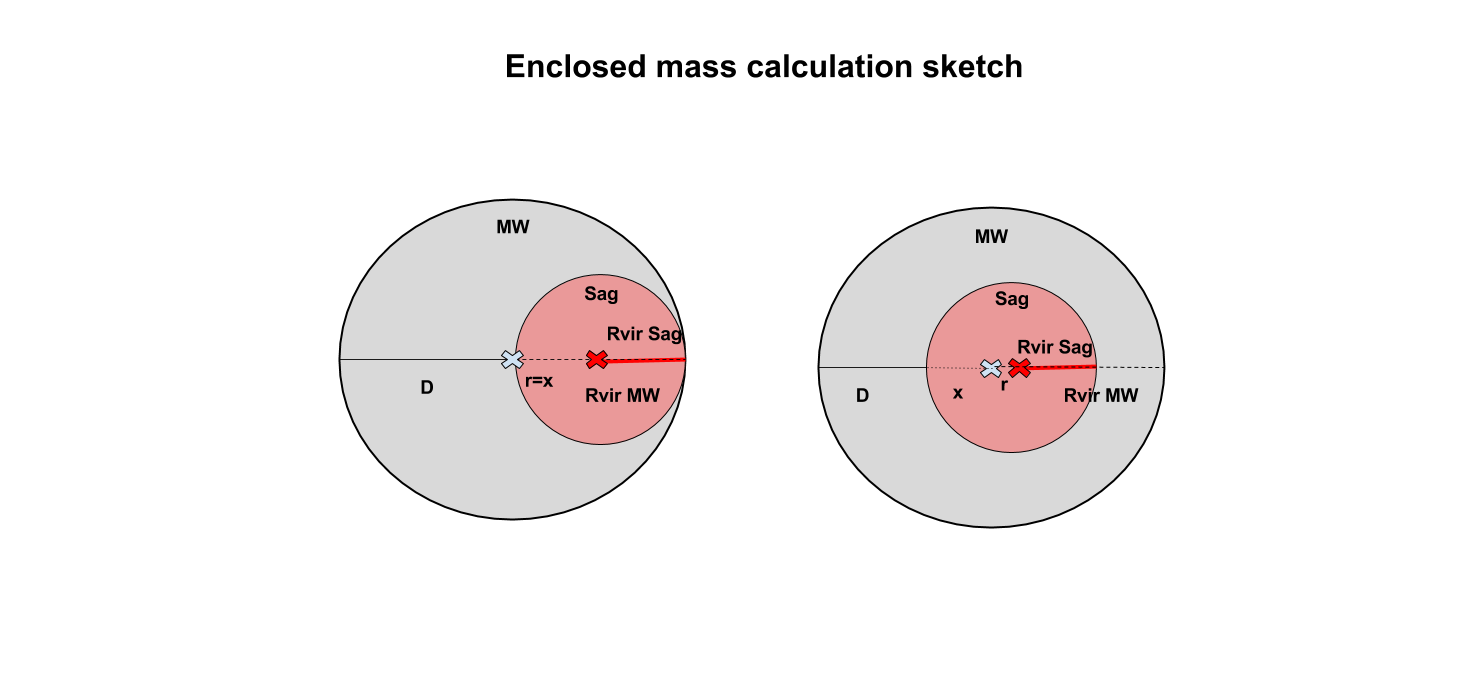

In [3]:
Img = Image('enclosed_mass.png')
display(Img)

In [7]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [9]:
MW = loadtxt('MW_orb.dat')
Sag = loadtxt('Sgr_orb.dat')

# form N-body

t1 = MW[:,-1]

xMW = MW[:,0]
yMW = MW[:,1]
zMW = MW[:,2]

xSag = Sag[:,0]
ySag = Sag[:,1]
zSag = Sag[:,2]

vxMW = MW[:,3]
vyMW = MW[:,4]
vzMW = MW[:,5]

vxSag = Sag[:,3]
vySag = Sag[:,4]
vzSag = Sag[:,5]

In [10]:
!python ../../sgr_orbit.py 1 > mass_enclosed.dat

In [11]:
Mass_enclosed = loadtxt('mass_enclosed.dat')

In [4]:
def mass_NFWnRvir(c, r , M, a):
    M = M 
    f = np.log(1.0 + c) - ( c / (1.0 + c) )
    mass = M * (np.log(1 + r/a) - r/(a+r) ) / f
    return mass

In [22]:
cMW = 9.86
Mhalo = 1E12
a = 26.47
RvMW = 261
Rsag = 121.25

In [23]:
r = linspace(1, 261, 100)
X = RvMW - (Rsag - r)
M_frac = mass_NFWnRvir(cMW, X, Mhalo, a)

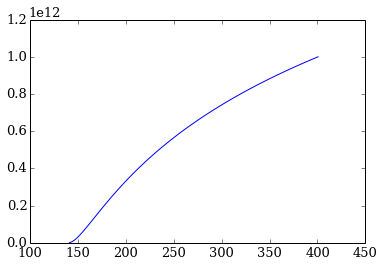

In [24]:
plot(X, M_frac)

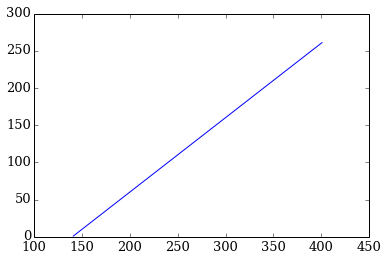

In [25]:
plot(X, r)